In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tlf
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist

(X_train ,y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape) # color였으면 x,a,b,3이 나와야하지만 x,a,b,1인 형태라 흑백인 이미지인 것을 인지할 수 있음
# tensorflow는 높이, 너비, 채널 형식임
# torch는 채널, 높이, 너비 임

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
pd.Series(y_train).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [4]:
samples = np.random.randint(60000,size = 9)
samples

array([59845, 19641, 29541,  2437,  2177, 48398, 58045, 12004, 38720])

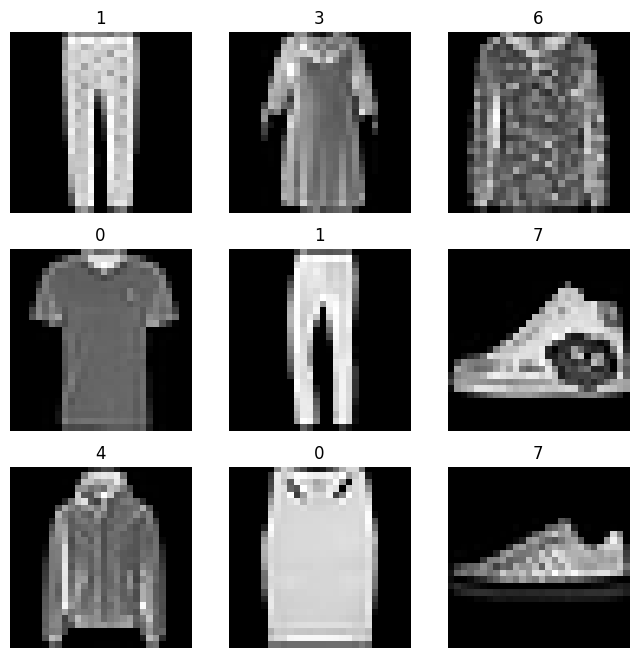

In [5]:
plt.figure(figsize = (8,8))
for i, idx in enumerate(samples):
  plt.subplot(3,3,1+i)
  plt.imshow(X_train[idx],cmap = 'gray') #colormap
  plt.axis('off')
  plt.title(y_train[idx])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [7]:
X_train_s = X_train.astype('float32')/255. #.을 붙여서 다시 float형태로 바꿈
X_val_s = X_val.astype('float32')/255.

In [8]:
np.max(X_train_s) , np.min(X_val_s)

(1.0, 0.0)

In [9]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [10]:
X_train_s = X_train_s.reshape(-1,28*28)
X_val_s = X_val_s.reshape(-1,28*28)

In [11]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units = 64,activation = 'relu',input_shape = ((28*28),)),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [14]:
EPOCHS = 10
BATCH_SIZE = 64

history = model.fit(
    X_train_s, y_train_o,
    batch_size =BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (X_val_s,y_val_o),
    verbose =1
)



Epoch 1/10
750/750 [==============================] - 11s 9ms/step - loss: 0.5758 - accuracy: 0.8020 - val_loss: 0.4432 - val_accuracy: 0.8432
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.4098 - accuracy: 0.8542 - val_loss: 0.3846 - val_accuracy: 0.8602
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3661 - accuracy: 0.8679 - val_loss: 0.3702 - val_accuracy: 0.8682
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3429 - accuracy: 0.8748 - val_loss: 0.3581 - val_accuracy: 0.8710
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3226 - accuracy: 0.8823 - val_loss: 0.3472 - val_accuracy: 0.8728
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3082 - accuracy: 0.8870 - val_loss: 0.3559 - val_accuracy: 0.8731
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2968 - accuracy: 0.8908 - val_loss: 0.3278 - val_accuracy: 0.8832
Epoch

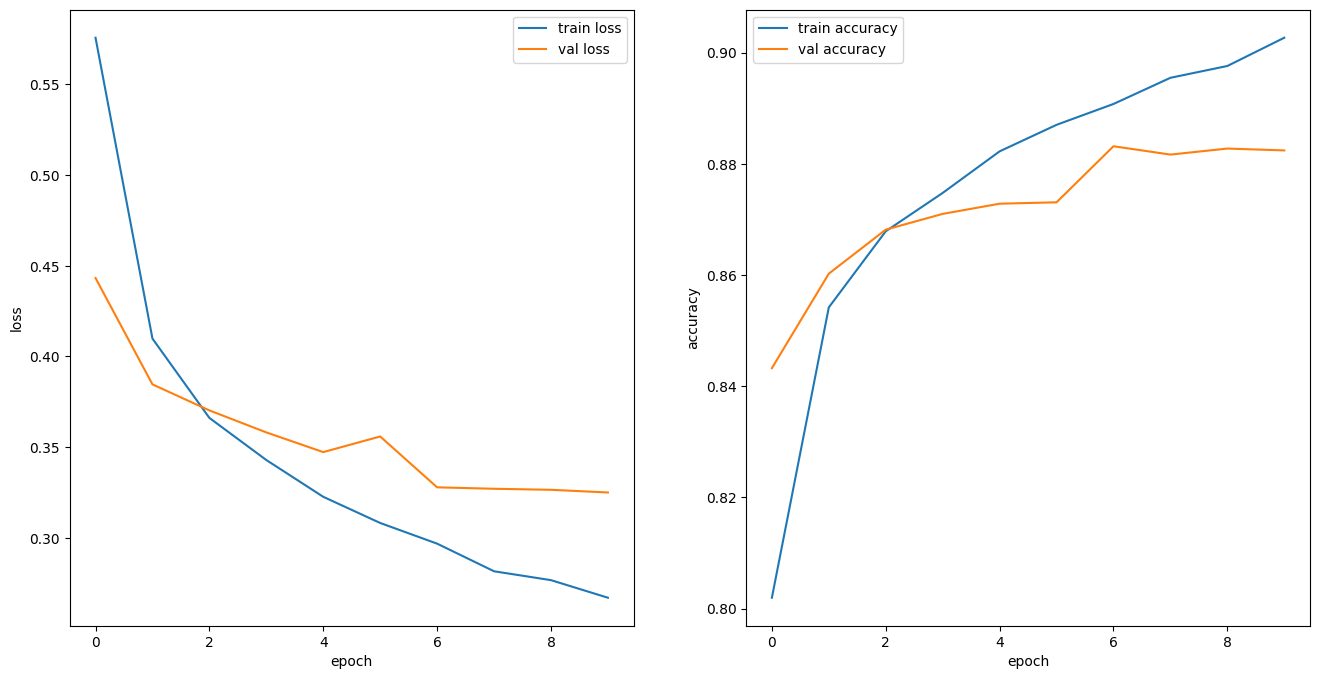

In [15]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

plot_history(history)

In [16]:
X_test_s = X_test.astype('float32')/255.
X_test_s = X_test_s.reshape(-1,28*28)

y_test_o = to_categorical(y_test)

In [18]:
y_pred = model.predict(X_test_s)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.20445329e-05, 6.89977964e-10, 1.29764866e-08, 5.77674300e-08,
        1.58042269e-07, 1.26565318e-03, 1.10947849e-06, 1.51228132e-02,
        3.63172489e-06, 9.83594418e-01],
       [4.68383405e-05, 9.69669067e-11, 9.98173177e-01, 3.48505891e-10,
        1.26233196e-03, 4.12742368e-10, 5.17588633e-04, 5.48008305e-09,
        4.22045794e-08, 1.35937208e-11],
       [3.88799754e-06, 9.99995649e-01, 2.29365043e-07, 1.22410881e-07,
        7.40714086e-08, 3.81572164e-15, 1.23992727e-08, 2.71915774e-18,
        2.10825411e-12, 2.48068818e-12],
       [1.22808808e-06, 9.99991477e-01, 4.64911437e-07, 5.84553027e-06,
        8.42796965e-07, 1.07780744e-12, 6.27155359e-08, 7.72415613e-15,
        6.50929449e-11, 3.12784548e-10],
       [1.81105092e-01, 4.61713944e-06, 2.75867656e-02, 2.63701146e-03,
        6.18764758e-03, 2.39033852e-06, 7.82303095e-01, 9.18931732e-07,
        1.65704696e-04, 6.76599211e-06]], dtype=float32)

In [19]:
y_pred = np.argmax(y_pred,axis = 1)
y_pred[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0])

In [20]:
pd.Series(y_test)[:20]

0     9
1     2
2     1
3     1
4     6
5     1
6     4
7     6
8     5
9     7
10    4
11    5
12    7
13    3
14    4
15    1
16    2
17    4
18    8
19    0
dtype: uint8

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

def print_metrics(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred) # 정답값, 예측
  print(f'optimal_accuracy: {acc}')
  acc = recall_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'recall_score: {acc}')
  acc = precision_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'precision_score: {acc}')
  acc = f1_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'precision_score: {acc}')

print_metrics(y_test,y_pred)

optimal_accuracy: 0.8721
recall_score: 0.8721
precision_score: 0.8743402048186633
precision_score: 0.8714724505957209


In [22]:
wrong_idx = np.where(y_pred != y_test)[0]
rdm_wrong_idx = np.random.choice(wrong_idx,size = 9)
rdm_wrong_idx


array([ 147, 9502, 4685, 5336, 5511, 2397, 6160, 2037, 6096])

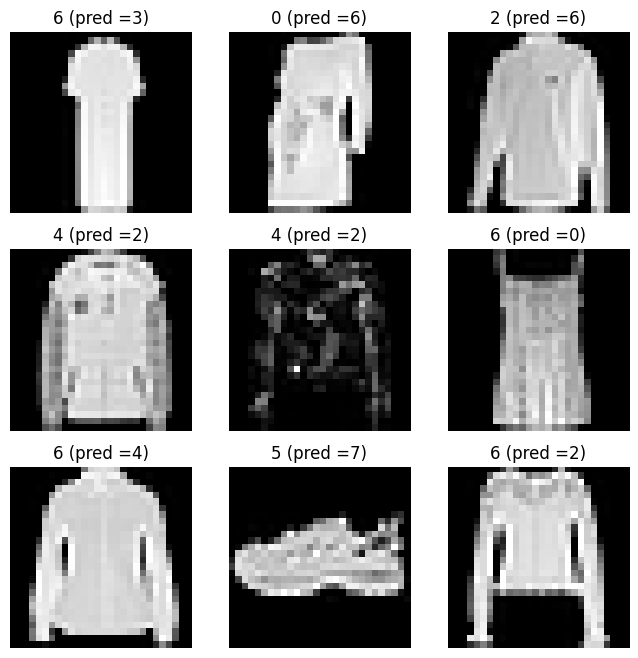

In [23]:
plt.figure(figsize = (8,8))
for i, idx in enumerate(rdm_wrong_idx):
  plt.subplot(3,3,1+i)
  plt.imshow(X_test[idx],cmap = 'gray') #colormap
  plt.axis('off')
  plt.title(f'{y_test[idx]} (pred ={y_pred[idx]})')
plt.show()